# Words Analysis 

## Data Cleaning

In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb
import os


pd.set_option('display.max_rows', 300) # specifies number of rows to show
# specifies default number format to 4 decimal places
pd.options.display.float_format = '{:40,.2f}'.format 
pd.options.display.max_colwidth 
pd.options.display.max_colwidth = 1500

In [2]:
# For Cleaning Tweets and Sentiment Analysis
import string
import nltk

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
#import nltk and download all stopwords and punctuations
nltk.download('stopwords')
nltk.download('punkt')

import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/audevuilliomenet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/audevuilliomenet/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# Need to install plotly before using it! Run the !pip command bellow!
# !pip install plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.io as pio

#You can also plot your graphs offline inside a Jupyter Notebook Environment. 
#First you need to initiate the Plotly Notebook mode as below:
init_notebook_mode(connected=True)

In [5]:
#df.to_csv("Tweeter_Data.csv")
twittertext = pd.read_csv("Tweeter_Data.csv")
twittertext.head(4)

,Unnamed: 0,Date,UserID,UserScreenName,Text,UserLocation,UserFollowers,UserFriends,UserLanguage,RetweetUserID,Just_Date,Hour
0,0,2019-03-06 23:59:53+00:00,"1,100,000,000,000,000,000.00",SevignyMel,RT @ColeTheBlackCat: Happy Pancake Day! 🍴\n#PancakeDay #PancakeTuesday #PanCakeDay2019 #ColeAndMarmalade https://t.co/AJkMoG3KFB,"Central Florida, USA",9.00,85.00,en,"1,040,000,000,000,000,000.00",2019-03-06,23
1,1,2019-03-06 23:59:31+00:00,"1,100,000,000,000,000,000.00",traceylockley,"RT @Missguided: Happy #PancakeDay babes 💖🥞Think your pancakes are 💯+ wanna win a £100 MG voucher?\n\n1. Follow, RT + like this tweet\n2. Reply to this thread with a pic of your pancakes\n3. Tell us why you should win using the hashtag #RateMyPancakes\n\n✨Winner announced Thursday (📸@sugarberrry) https://t.co/GNKDkhX2GM","Hampshire, England",114.00,716.00,en-GB,"3,911,179,642.00",2019-03-06,23
2,2,2019-03-06 23:59:20+00:00,"1,100,000,000,000,000,000.00",FelixSarconaIT,RT @sesamestreet: Celebrating #PancakeDay with @elmo pancakes by @Tiger__Tomato! 🥞 https://t.co/Eun6nxYIX8,NaN,nan,7.00,en,"3,280,419,312.00",2019-03-06,23
3,3,2019-03-06 23:58:44+00:00,"1,100,000,000,000,000,000.00",Eliequeen,@MagnetUK 🥞 #Competition #Prize #Giveaway #PancakeDay,NaN,586.00,"5,002.00",en,"58,843,664.00",2019-03-06,23


In [6]:
twittertext.shape

(70969, 12)

In [7]:
twittertext = twittertext.drop(['Unnamed: 0'], axis=1)

In [8]:
twittertext.head(1)

,Date,UserID,UserScreenName,Text,UserLocation,UserFollowers,UserFriends,UserLanguage,RetweetUserID,Just_Date,Hour
0,2019-03-06 23:59:53+00:00,"1,100,000,000,000,000,000.00",SevignyMel,RT @ColeTheBlackCat: Happy Pancake Day! 🍴\n#PancakeDay #PancakeTuesday #PanCakeDay2019 #ColeAndMarmalade https://t.co/AJkMoG3KFB,"Central Florida, USA",9.00,85.00,en,"1,040,000,000,000,000,000.00",2019-03-06,23


In [9]:
# Remove all the https
twittertext.Text = twittertext.Text.str.replace(r'http\S+','')

In [10]:
# Remove all the '\n' line-brakes
twittertext.Text = twittertext.Text.str.replace(r'\n','')

In [11]:
# Remove 'non-ascii' characters
twittertext.Text = twittertext.Text.str.replace(r'[^\x00-\x7F]','')
# Make all the text lowercase
twittertext.Text = twittertext.Text.str.lower()

In [12]:
#create a column for all #hasthtags that appears in the text
twittertext['hashtags'] = twittertext.Text.str.findall(r'#\S+')
#create a column for all @twitter handles that appears in the tweets
twittertext['twitter_handles'] = twittertext.Text.str.findall(r'@[\w]*')

In [13]:
# Remove all the punctuation 
twittertext['cleanText'] = twittertext.Text.apply(
    lambda x:x.translate(str.maketrans('','', string.punctuation)))

In [27]:
#rename_words = {'pancakes':'pancake'}
twittertext['cleanText'] = twittertext['cleanText'].replace(regex=r'pancakes.$', value='pancake')

Looking at the cleanText column, we can see that there are still some words that we won't need for the tweeters words analysis. For example, 'rt' and 'amp' aren't really useful to understand what the people are telling about PancakeDay. Moreover, the cleanText columns contain the hashtags and twitter handles, this can be a bit annoying when analyzing the content of the tweets. Let's create column without the hashtags and handles!

In [16]:
# Create a column for clean text that do not have #hashtags and the twitter_handles!
twittertext['no_hashhand_cleanText']  = twittertext.Text.str.replace(r'#\S+','')
# Remove the @twitter_handles from the tweets
twittertext.no_hashhand_cleanText  = twittertext.no_hashhand_cleanText.str.replace(r'@[\w]*','')
# And Remove all the other punctuation!
twittertext['no_hashhand_cleanText'] = twittertext.no_hashhand_cleanText.apply(
    lambda x:x.translate(str.maketrans('','', string.punctuation)))

In [17]:
# Tokenise all of the clean text
twittertext['all_tokenText'] = twittertext.cleanText.apply(word_tokenize)
twittertext['no_hashhand_tokenText'] = twittertext.no_hashhand_cleanText.apply(word_tokenize)

In [18]:
# Count the number of Token in the tweets
twittertext['all_tokenCount'] = twittertext.all_tokenText.apply(len)
twittertext['no_hashhand_tokenText'] = twittertext.no_hashhand_tokenText.apply(len)

In [19]:
# Remove all the stopwords and the other useless words!
stop = stopwords.words('english')
other = ['rt','amp']

remove = stop + other

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
twittertext['all_noStopWords'] = twittertext['cleanText'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in (remove)]))

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
twittertext['no_hashhand_noStopWords'] = twittertext['no_hashhand_cleanText'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in (remove)]))

In [20]:
#tokenise all of the text with NoStop words
twittertext['all_tokenText_noStop'] = twittertext.all_noStopWords.apply(word_tokenize)
twittertext['no_hashhand_tokenText_noStop'] = twittertext.no_hashhand_noStopWords.apply(word_tokenize)

In [21]:
twittertext.shape

(70969, 22)

In [28]:
twittertext.head(2)

,Date,UserID,UserScreenName,Text,UserLocation,UserFollowers,UserFriends,UserLanguage,RetweetUserID,Just_Date,...,twitter_handles,cleanText,no_hashhand_cleanText,all_tokenText,no_hashhand_tokenText,all_tokenCount,all_noStopWords,no_hashhand_noStopWords,all_tokenText_noStop,no_hashhand_tokenText_noStop
0,2019-03-06 23:59:53+00:00,"1,100,000,000,000,000,000.00",SevignyMel,rt @coletheblackcat: happy pancake day! #pancakeday #pancaketuesday #pancakeday2019 #coleandmarmalade,"Central Florida, USA",9.00,85.00,en,"1,040,000,000,000,000,000.00",2019-03-06,...,[@coletheblackcat],2019-03-06 23:59:53+00:00,rt happy pancake day,"[rt, coletheblackcat, happy, pancake, day, pancakeday, pancaketuesday, pancakeday2019, coleandmarmalade]",4,9,coletheblackcat happy pancake day pancakeday pancaketuesday pancakeday2019 coleandmarmalade,happy pancake day,"[coletheblackcat, happy, pancake, day, pancakeday, pancaketuesday, pancakeday2019, coleandmarmalade]","[happy, pancake, day]"
1,2019-03-06 23:59:31+00:00,"1,100,000,000,000,000,000.00",traceylockley,"rt @missguided: happy #pancakeday babes think your pancakes are + wanna win a 100 mg voucher?1. follow, rt + like this tweet2. reply to this thread with a pic of your pancakes3. tell us why you should win using the hashtag #ratemypancakeswinner announced thursday (@sugarberrry)","Hampshire, England",114.00,716.00,en-GB,"3,911,179,642.00",2019-03-06,...,"[@missguided, @sugarberrry]",2019-03-06 23:59:31+00:00,rt happy babes think your pancakes are wanna win a 100 mg voucher1 follow rt like this tweet2 reply to this thread with a pic of your pancakes3 tell us why you should win using the hashtag announced thursday,"[rt, missguided, happy, pancakeday, babes, think, your, pancakes, are, wan, na, win, a, 100, mg, voucher1, follow, rt, like, this, tweet2, reply, to, this, thread, with, a, pic, of, your, pancakes3, tell, us, why, you, should, win, using, the, hashtag, ratemypancakeswinner, announced, thursday, sugarberrry]",40,44,missguided happy pancakeday babes think pancakes wanna win 100 mg voucher1 follow like tweet2 reply thread pic pancakes3 tell us win using hashtag ratemypancakeswinner announced thursday sugarberrry,happy babes think pancakes wanna win 100 mg voucher1 follow like tweet2 reply thread pic pancakes3 tell us win using hashtag announced thursday,"[missguided, happy, pancakeday, babes, think, pancakes, wan, na, win, 100, mg, voucher1, follow, like, tweet2, reply, thread, pic, pancakes3, tell, us, win, using, hashtag, ratemypancakeswinner, announced, thursday, sugarberrry]","[happy, babes, think, pancakes, wan, na, win, 100, mg, voucher1, follow, like, tweet2, reply, thread, pic, pancakes3, tell, us, win, using, hashtag, announced, thursday]"


We know that many of the tweets are retweeted! So, let's remove the duplicates from the tweets based on the Text cleaning we have just made! We will use the colum 'no_hashhand_tokenText_noStop' for that! 

In [36]:
#Delete the duplicates of the tweets!
twittertext = twittertext.drop_duplicates('no_hashhand_noStopWords')

In [37]:
twittertext.shape

(23019, 22)

In [38]:
total_tweets = len(twittertext)
print("The total number of non duplicated tweets for words analysis is " + str(total_tweets) + ".")

The total number of non duplicated tweets for words analysis is 23019.


In [ ]:
# Save the non duplicated tweets in a csv file!
#twittertext.to_csv('Clean_Tweets.csv')
#twittertext = pd.read_csv('Clean_Tweets.csv')

### Understand Most Words in Tweets! 

### Counts Words

In [39]:
# Take all the tokens (separated words) and append them in a list
# We have a giant list of all words that have been writen in the tweets
# Other Explaination: Flatten 'no_hashhand_tokenText_noStop' into one list

tokens = []

for sublist in twittertext.no_hashhand_tokenText_noStop:
    for word in sublist:
        tokens.append(word)

In [40]:
# Calculate the length of the list / number of entries!
nb_tokens = len(tokens)
print("The total number of words for all the tweets is " + str(nb_tokens) + ".")

The total number of words for all the tweets is 216248.


Here pancake and pancakes are two different words! As their meaning is the same, we will just change all words pancakes to pancake! 

In [41]:
# Turn the list into a dataframe -> easier to deal with!
tokens_df = pd.DataFrame(tokens)
# Give a name to the column of the dataframe
tokens_df.columns = ['words']

rename_words = {'pancakes':'pancake'}
tokens_df['words'] = tokens_df['words'].replace(rename_words)

In [42]:
# Calculate the number of time a word appear in the tweets 
tokens_df['count'] = tokens_df.groupby('words')['words'].transform('count')

In [43]:
# Order the dataframe with the highest number of words at the top. 
tokens_df = tokens_df.sort_values(by=['count'], ascending=False)
# Drop the duplicates of the words! Show only the top ten first world!
tokens_df = tokens_df.drop_duplicates(['words'], keep='first')

Here we will calculate the frequency of the words and not only the count! I assume in this calculation that each words appears only once in each tweet. In other words, when writting a tweet, a Twitter user will never use two times the same words! This is not 100% true, but it gives an approximation!
Ps: I will have to look at a better way to do that! Any comments or thoughts, would be appreciated! 

In [44]:
# Add the frequency of occurance of the words!
tokens_df['frequency_totwords'] = (tokens_df['count']/nb_tokens)*100
tokens_df['frequency_tottweets'] = (tokens_df['count']/total_tweets)*100

In [45]:
# Print the 20 most frequent words!
tokens_df.head(20)

,words,count,frequency_totwords,frequency_tottweets
66305,pancake,15446,7.14,67.10
174326,day,5400,2.50,23.46
69904,happy,3655,1.69,15.88
128064,today,2691,1.24,11.69
170040,us,1490,0.69,6.47
170499,make,1263,0.58,5.49
207901,tuesday,1251,0.58,5.43
31648,like,1148,0.53,4.99
177001,one,1140,0.53,4.95
139107,get,1092,0.50,4.74


In [46]:
data = [Bar(
        y=tokens_df['words'][0:10], # assign x as the dataframe column 'x'
        x=tokens_df['frequency_tottweets'][0:10], 
        orientation = 'h',
)]

layout = Layout(
    title="Top 10 most famous words",
    xaxis=dict(title='Frequency of each word (%)'),
    yaxis=dict(title='Words', automargin = True, autorange='reversed'),
    margin=dict(pad=10), 
    width=400
)

fig = Figure(data=data, layout=layout)

iplot(fig)

In [ ]:
data = [Bar(
        y=tokens_df['words'][0:10], # assign x as the dataframe column 'x'
        x=tokens_df['count'][0:10], 
        orientation = 'h',
)]

layout = Layout(
    title="Top 10 most famous words",
    xaxis=dict(title='Count number of each word in the tweets'),
    yaxis=dict(title='Words', automargin = True, autorange='reversed'),
    margin=dict(pad=10), 
    width=400
)

fig = Figure(data=data, layout=layout)

iplot(fig)

In [ ]:
# For the further analysis, selection only the first 30 most common words!
word_count = words_df[0:30]

### Hastags

In [47]:
# Repeat the same steps for the hashtags! 
hashtags = []

for sublist in twittertext.hashtags:
    for word in sublist:
        hashtags.append(word)

In [48]:
# Calculate the length of the list / number of entries! (! This is with duplicate entries)
nb_hashtags = len(hashtags)
print("Total number of hashtags is " + str(nb_hashtags) + ".")

Total number of hashtags is 66591.


In [49]:
# Transform the list of hastags into a dataframe
hashtags_df = pd.DataFrame(hashtags)
# Rename the columns of the dataframe
hashtags_df.columns = ['hashtags']

In [50]:
# Remove the specific punctuation (!?,.) 
hashtags_df['hashtags'] = hashtags_df.hashtags.str.replace('[!,?.\s]','')

#Rename the hashtags that are similar (#pancakes and #pancake!)
rename_hashtags = {'#pancakes':'#pancake'}
hashtags_df['hashtags'] = hashtags_df['hashtags'].replace(rename_hashtags)

In [51]:
# Calculate the number of time a hashtag appear in the tweets
hashtags_df['count'] = hashtags_df.groupby('hashtags')['hashtags'].transform('count')

In [52]:
# Order the dataframe with the highest number of words at the top. 
hashtags_df = hashtags_df.sort_values(by=['count'], ascending=False)
# Drop the duplicates of the words! Show only the top ten first world!
hashtags_df = hashtags_df.drop_duplicates(['hashtags'], keep='first')

In [53]:
noduplicate_hashtags = len(hashtags_df)
print("Total number of single hashtags is " + str(noduplicate_hashtags) + ".")

Total number of single hashtags is 14897.


Here again, we will calculate the frequency of the hashtags and not only the count! I assume in this calculation that each hashtags appears only once. In other words, when writting a tweets, a Twitter user will never use two times the same hashtag! 

In [54]:
# Add the frequency of occurance of the words!
hashtags_df['frequency_tottweets'] = (hashtags_df['count']/total_tweets)*100
hashtags_df['frequency_tothashtags'] = (hashtags_df['count']/nb_hashtags)*100

In [55]:
# Print the 20 most frequent words!
hashtags_df.head(20)

,hashtags,count,frequency_tottweets,frequency_tothashtags
0,#pancakeday,22514,97.81,33.81
43948,#shrovetuesday,5100,22.16,7.66
36837,#pancake,3614,15.70,5.43
49681,#pancaketuesday,2170,9.43,3.26
18327,#pancakeday2019,591,2.57,0.89
44224,#tuesdaythoughts,409,1.78,0.61
24892,#fattuesday,395,1.72,0.59
53232,#mardigras,319,1.39,0.48
49562,#food,290,1.26,0.44
45118,#vegan,286,1.24,0.43


In [56]:
data = [Bar(
        y=hashtags_df['hashtags'][0:10], # assign x as the dataframe column 'x'
        x=hashtags_df['frequency_tottweets'][0:10], 
        orientation = 'h',
)]

layout = Layout(
    title="Top 10 most famous hashtags",
    xaxis=dict(title='Frequency of each hashtag (%)'),
    yaxis=dict(title='Hashtags', automargin = True, autorange='reversed'),
    margin=dict(pad=10), 
    width=500
)

fig = Figure(data=data, layout=layout)

iplot(fig)

In [ ]:
data = [Bar(
        y=hashtags_df['hashtags'][0:10], # assign x as the dataframe column 'x'
        x=hashtags_df['frequency'][0:10], 
        orientation = 'h',
)]

layout = Layout(
    title="Top 10 most famous hashtags",
    xaxis=dict(title='Frequency of each hashtags (%)'),
    yaxis=dict(title='Hashtags', automargin = True, autorange='reversed'),
    margin=dict(pad=10), 
    width=500
)

fig = Figure(data=data, layout=layout)

iplot(fig)

### Word2Vec

### NLP - Natural Language Processing

What is Word2vec?
- Models use to produce word embeddings (words, sentences from a vocabulary are mapped to vectors of real numbers). Algorithm created by Tomas Mikolov's team at Goggle. 
- Main Idea: Find similarity of words
- Core Assumption: Meaning of words is affected by the words around it. 

Steps and Techniques for Word2Vec:

I. Continuous Bag of Words (CBOW):
- Input: Context of the neighboring words
- Output: Target word
- Window: Limit the number of words in each context

II. Skip Gram:
- Input: Target word
- Output: Context of the neighboring words
- Window: Limit the number of words in each context

III. Steps:
- Chose the techniques (CBOW or Skip Gram), this will determine how to run Word2Vec algorithm
- Create a corpus of text (the input). Here the corpus will be the list of all clean tweets. 
- Produce a vector space: Each words of the corpus is assigned to its corresponding vector.
- Position the words vectors such that words with common contexts are closed to one another is the space. 

Why is it interesting to use Word2Vec? 
- The meaning of a word is usually influenced by the other words used in the sentence! Imagine, we have two words that are closely related to one another, the words show then some similarity. Here, we could think about the words "vegan" and "plant-based", both used to describe food that does not come from any animals.
- How to know which words present similarity? How to find words that are closely related to each other? How to find the categories of these words automatically?

Word2Vec Model:
- Center word: Word which chose to focus on
- Context words: Words around the center word
- Size: Dimensionality of the vector. Higher the size, denser the embeddings.
- Window: Define the number of context word
- Min-count: Threshold value, word with frequency below min-count are dropped before training occurs, they wont be included into the model.
- Workers: Used for parallelization

#### Specific comments on this analysis!
What is the purpose of using Word2Vec? 
- Core Objectif: Understand the context of specific word. What do twitters associated with words such as 'veganuary', 'veganism' or 'plantbased'. 
- Method: Skip-Gram - Prediction of the context given a word
- Note: Training of our own word vectors

### Where to find useful tutorials?

- Word2vec Tutorial: https://rare-technologies.com/word2vec-tutorial/
- Medium Article - Good Explanation: https://medium.freecodecamp.org/how-to-get-started-with-word2vec-and-then-how-to-make-it-work-d0a2fca9dad3
- Back to the source - Google Paper: https://arxiv.org/pdf/1301.3781.pdf

- Another Word2Vec Tutorial - But this time it is in TensorFlow: https://towardsdatascience.com/learn-word2vec-by-implementing-it-in-tensorflow-45641adaf2ac

In [ ]:
# Install Gensim Library pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install --upgrade gensim

In [57]:
# Import the train google model!
from gensim.models import word2vec

In [58]:
twittertext.head(2)

,Date,UserID,UserScreenName,Text,UserLocation,UserFollowers,UserFriends,UserLanguage,RetweetUserID,Just_Date,...,twitter_handles,cleanText,no_hashhand_cleanText,all_tokenText,no_hashhand_tokenText,all_tokenCount,all_noStopWords,no_hashhand_noStopWords,all_tokenText_noStop,no_hashhand_tokenText_noStop
0,2019-03-06 23:59:53+00:00,"1,100,000,000,000,000,000.00",SevignyMel,rt @coletheblackcat: happy pancake day! #pancakeday #pancaketuesday #pancakeday2019 #coleandmarmalade,"Central Florida, USA",9.00,85.00,en,"1,040,000,000,000,000,000.00",2019-03-06,...,[@coletheblackcat],2019-03-06 23:59:53+00:00,rt happy pancake day,"[rt, coletheblackcat, happy, pancake, day, pancakeday, pancaketuesday, pancakeday2019, coleandmarmalade]",4,9,coletheblackcat happy pancake day pancakeday pancaketuesday pancakeday2019 coleandmarmalade,happy pancake day,"[coletheblackcat, happy, pancake, day, pancakeday, pancaketuesday, pancakeday2019, coleandmarmalade]","[happy, pancake, day]"
1,2019-03-06 23:59:31+00:00,"1,100,000,000,000,000,000.00",traceylockley,"rt @missguided: happy #pancakeday babes think your pancakes are + wanna win a 100 mg voucher?1. follow, rt + like this tweet2. reply to this thread with a pic of your pancakes3. tell us why you should win using the hashtag #ratemypancakeswinner announced thursday (@sugarberrry)","Hampshire, England",114.00,716.00,en-GB,"3,911,179,642.00",2019-03-06,...,"[@missguided, @sugarberrry]",2019-03-06 23:59:31+00:00,rt happy babes think your pancakes are wanna win a 100 mg voucher1 follow rt like this tweet2 reply to this thread with a pic of your pancakes3 tell us why you should win using the hashtag announced thursday,"[rt, missguided, happy, pancakeday, babes, think, your, pancakes, are, wan, na, win, a, 100, mg, voucher1, follow, rt, like, this, tweet2, reply, to, this, thread, with, a, pic, of, your, pancakes3, tell, us, why, you, should, win, using, the, hashtag, ratemypancakeswinner, announced, thursday, sugarberrry]",40,44,missguided happy pancakeday babes think pancakes wanna win 100 mg voucher1 follow like tweet2 reply thread pic pancakes3 tell us win using hashtag ratemypancakeswinner announced thursday sugarberrry,happy babes think pancakes wanna win 100 mg voucher1 follow like tweet2 reply thread pic pancakes3 tell us win using hashtag announced thursday,"[missguided, happy, pancakeday, babes, think, pancakes, wan, na, win, 100, mg, voucher1, follow, like, tweet2, reply, thread, pic, pancakes3, tell, us, win, using, hashtag, ratemypancakeswinner, announced, thursday, sugarberrry]","[happy, babes, think, pancakes, wan, na, win, 100, mg, voucher1, follow, like, tweet2, reply, thread, pic, pancakes3, tell, us, win, using, hashtag, announced, thursday]"


In [59]:
# Create a list of all the words to pass it on the Word2Vec model. 
list_nohashhand = list(twittertext['no_hashhand_tokenText_noStop'])
list_all = list(twittertext['all_tokenText_noStop'])

In [60]:
# Have a look to understand what the structure of a list (corpus) look like!
print(list_nohashhand[0:3])
print()
print(list_all[0:3])

[['happy', 'pancake', 'day'], ['happy', 'babes', 'think', 'pancakes', 'wan', 'na', 'win', '100', 'mg', 'voucher1', 'follow', 'like', 'tweet2', 'reply', 'thread', 'pic', 'pancakes3', 'tell', 'us', 'win', 'using', 'hashtag', 'announced', 'thursday'], ['celebrating', 'pancakes']]

[['coletheblackcat', 'happy', 'pancake', 'day', 'pancakeday', 'pancaketuesday', 'pancakeday2019', 'coleandmarmalade'], ['missguided', 'happy', 'pancakeday', 'babes', 'think', 'pancakes', 'wan', 'na', 'win', '100', 'mg', 'voucher1', 'follow', 'like', 'tweet2', 'reply', 'thread', 'pic', 'pancakes3', 'tell', 'us', 'win', 'using', 'hashtag', 'ratemypancakeswinner', 'announced', 'thursday', 'sugarberrry'], ['sesamestreet', 'celebrating', 'pancakeday', 'elmo', 'pancakes', 'tigertomato']]


In [61]:
# How many tweets are part of the corpus (list of tweets)
print(len(list_nohashhand))
print(len(list_all))

23019
23019


### Corpus without hashtags!

In [359]:
model = word2vec.Word2Vec(list_nohashhand, 
                          size=150, 
                          window=10, 
                          min_count=30, 
                          workers=10)
#Here we will not train the model based on our list, but take the pretrained model from Gensim library!
#model.train(list_nohashhand, total_examples=len(list_nohashhand), epochs=10)

In [360]:
# Have a look at the results! The top 20 similar words associated with 'pancakes'
w1 = 'pancake'
model.wv.most_similar(positive=w1,topn=20)

[('happy', 0.9228134155273438),
 ('everyone', 0.9042329788208008),
 ('office', 0.8998490571975708),
 ('day', 0.8896953463554382),
 ('enjoying', 0.8869311213493347),
 ('today', 0.8852770328521729),
 ('celebrate', 0.8731229901313782),
 ('best', 0.870305597782135),
 ('aka', 0.866796612739563),
 ('celebrating', 0.8629353046417236),
 ('whos', 0.8574542999267578),
 ('everyones', 0.8571310639381409),
 ('mardi', 0.856901228427887),
 ('comments', 0.8537378311157227),
 ('gras', 0.8451749086380005),
 ('wonderful', 0.8429638147354126),
 ('hq', 0.8413921594619751),
 ('days', 0.8344614505767822),
 ('known', 0.8340630531311035),
 ('followers', 0.8318740129470825)]

### Principal Component Analysis 

In [151]:
from sklearn.decomposition import PCA

# import the vocabulary we have just created (Words Vectors)! 
vocab = list(model.wv.vocab)
# Create the vector X holding the n dimensions for each words in the vocabulary!
X = model[model.wv.vocab]

# Reduce the n dimensions to 2D
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/Users/audevuilliomenet/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [152]:
# Have a look at the result - This should give a 2-Dimensional array! -> We can now plot it!
result[:3]

array([[-0.09873653,  2.2721334 ],
       [-0.30666324,  1.1827838 ],
       [-0.7995679 ,  1.9151264 ]], dtype=float32)

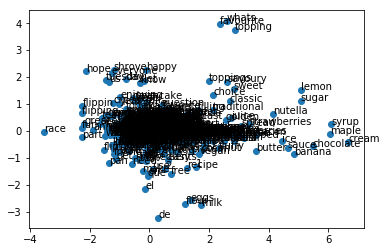

In [153]:
# Visualize the results in a scatter plot!
plt.scatter(result[:,0], result[:,1])

# Add meaning of the words to the scatter plot!
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i,0], result[i,1]))
plt.show()

In [154]:
# Understand the length of the list! How many words are in the 1st PCA decomposition?
test = list(model.wv.vocab)
len(test)

991

In [155]:
# Find now similarity using the words embddings we have created!
zipped = zip(model.wv.index2word, model.wv.vectors)

wordresult = [i for i in zipped if i[0] == word]
vecresult = [i for i in zipped if i[1] == vector]

In [735]:
# Find the 20 closest words to 'pancakes' and print the list!
pancakes_similar = pd.DataFrame(model.wv.most_similar('pancakes',topn=20))
#list(pancakes_similar[0])

In [157]:
# Create a dataframe with the similar words! With x,y-values! Coordinates of the words in 2D-Space!
word_frame = pd.DataFrame(result, index=vocab, columns=['x', 'y'])
word_frame.reset_index(inplace=True)
word_frame.columns = ['words', 'x', 'y']
word_frame.sort_values(by=['x','y'])
word_frame.head(4)

,words,x,y
0,happy,-0.10,2.27
1,pancake,-0.31,1.18
2,day,-0.80,1.92
3,think,-0.02,-0.02


In [158]:
model.wv.most_similar('pancakes',topn=20)

[('homemade', 0.9717468023300171),
 ('crispy', 0.9709711670875549),
 ('buttermilk', 0.9682566523551941),
 ('berry', 0.9622741341590881),
 ('dessert', 0.9621036648750305),
 ('available', 0.9620315432548523),
 ('jam', 0.9592007994651794),
 ('treat', 0.958744466304779),
 ('compote', 0.9578506946563721),
 ('greek', 0.9577023386955261),
 ('thick', 0.9576148986816406),
 ('spinach', 0.9572811722755432),
 ('apple', 0.9568415880203247),
 ('blueberry', 0.9562163949012756),
 ('stack', 0.9561353325843811),
 ('raspberry', 0.9560062885284424),
 ('chip', 0.9554986357688904),
 ('drizzled', 0.9548152089118958),
 ('hazelnut', 0.9535385966300964),
 ('salted', 0.9534578323364258)]

In [217]:
nearest = word_frame[word_frame.words.isin(['homemade','crispy','buttermilk','berry','dessert',
                                            'available','jam','treat','compote','greek','thick',
                                            'spinach','apple','blueberry','stack','raspberry',
                                            'chip','drizzled','hazelnut','salted','pancakes'])]

In [218]:
# Make the scatter plot to vizualise the words connected to vegan!
trace = [Scatter(
        x=nearest['x'], # assign x as the dataframe column 'x' 
        y=nearest['y'],
        text=nearest['words'],
        mode = 'markers+text',
        textposition='top left'
)]

layout = Layout(
    title="'Pancakes' Nearest Neighbours - No Hashtags",
    xaxis=dict(title='x'),
    yaxis=dict(title='y', automargin = True),
    width=600, height = 600
)

fig = Figure(data=trace, layout=layout)

iplot(fig)

### Corpus with hashtags!

In [729]:
# Build the Word2Vec model
model = word2vec.Word2Vec(list_all, 
                          size=150, 
                          window=8, 
                          min_count=40, 
                          workers=10)
#model.train(list_all, total_examples=len(list_all), epochs=10)
#model.wv['pancakes']

In [730]:
# Look at the hashtags that are similar to pancakes!
w1 = 'pancakeday'
model.wv.most_similar(positive=w1,topn=20)

[('offering', 0.7421575784683228),
 ('specials', 0.7321740984916687),
 ('cafe', 0.7311404943466187),
 ('excuse', 0.730993390083313),
 ('daypancakeday', 0.7267187833786011),
 ('7', 0.7252355813980103),
 ('indulge', 0.7242773175239563),
 ('person', 0.7242334485054016),
 ('restaurant', 0.7237724661827087),
 ('chefs', 0.7237200736999512),
 ('united', 0.7232937216758728),
 ('crempog', 0.7232900261878967),
 ('smile', 0.7212076187133789),
 ('meal', 0.7206800580024719),
 ('pancakespancakeday', 0.7203515768051147),
 ('starting', 0.7202239632606506),
 ('decided', 0.7199020981788635),
 ('snack', 0.7197684049606323),
 ('everyday', 0.7190679907798767),
 ('important', 0.7186092734336853)]

In [712]:
from sklearn.decomposition import PCA

# import the vocabulary we have just created (Words Vectors)! 
vocab = list(model.wv.vocab)
# Create the vector X holding the n dimensions for each words in the vocabulary!
X = model[model.wv.vocab]

# Reduce the n dimensions to 2D
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/Users/audevuilliomenet/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [629]:
# Have a look at the result - This should give a 2-Dimensional array! -> We can now plot it!
result[:3]

array([[-0.17658827,  2.2778091 ],
       [ 0.08078184,  0.7209171 ],
       [-0.7377649 ,  1.7139257 ]], dtype=float32)

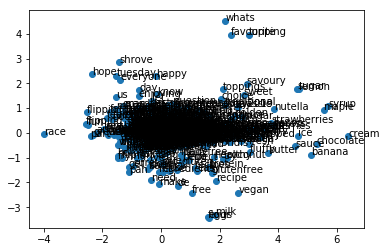

In [630]:
# Visualize the results in a scatter plot!
plt.scatter(result[:,0], result[:,1])

# Add meaning of the words to the scatter plot!
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i,0], result[i,1]))
plt.show()

In [631]:
# Understand the length of the list! How many words are in the 1st PCA decomposition?
test = list(model.wv.vocab)
len(test)

817

In [632]:
# Find now similarity using the words embddings we have created!
zipped = zip(model.wv.index2word, model.wv.vectors)

hashtagresult = [i for i in zipped if i[0] == word]
vecresult = [i for i in zipped if i[1] == vector]

In [734]:
# Find the 20 closest words to 'pancakes' and print the list!
pancakes_similar = pd.DataFrame(model.wv.most_similar('pancakeday',topn=20))
#list(pancakes_similar[0])

In [634]:
# Create a dataframe with the similar words! With x,y-values! Coordinates of the words in 2D-Space!
hashtag_frame = pd.DataFrame(result, index=vocab, columns=['x', 'y'])
hashtag_frame.reset_index(inplace=True)
hashtag_frame.columns = ['words', 'x', 'y']
hashtag_frame.sort_values(by=['x','y'])
hashtag_frame.head(4)

,words,x,y
0,happy,-0.18,2.28
1,pancake,0.08,0.72
2,day,-0.74,1.71
3,pancakeday,0.01,0.41


In [635]:
model.wv.most_similar('pancakeday',topn=20)

[('nationalpancakeday', 0.826763927936554),
 ('restaurant', 0.8184338808059692),
 ('english', 0.8175970911979675),
 ('indulge', 0.8166536092758179),
 ('specials', 0.8162581324577332),
 ('shrovetuesday2019', 0.8151681423187256),
 ('health', 0.814621090888977),
 ('cafe', 0.8119170069694519),
 ('foodies', 0.8090563416481018),
 ('open', 0.8086371421813965),
 ('united', 0.8083127737045288),
 ('feast', 0.8073768615722656),
 ('offering', 0.8035736083984375),
 ('however', 0.801826536655426),
 ('coffee', 0.8013437986373901),
 ('pancakeart', 0.8011349439620972),
 ('crempog', 0.800509512424469),
 ('dutch', 0.7997457981109619),
 ('pancakespancakeday', 0.7996771931648254),
 ('meal', 0.7995182871818542)]

In [636]:
nearest_hashtag_pd = hashtag_frame[hashtag_frame.words.isin(['nationalpancakeday',
 'restaurant',
 'english',
 'indulge',
 'specials',
 'shrovetuesday2019',
 'health',
 'cafe',
 'foodies',
 'open',
 'united',
 'feast',
 'offering',
 'however',
 'coffee',
 'pancakeart',
 'crempog',
 'dutch',
 'pancakespancakeday',
 'meal','pancakeday'])]

In [733]:
# Make the scatter plot to vizualise the words connected to vegan!
trace = [Scatter(
        x=nearest_hashtag ['x'], # assign x as the dataframe column 'x' 
        y=nearest_hashtag ['y'],
        text=nearest_hashtag ['words'],
        mode = 'markers+text',
        textposition='bottom right'
)]

layout = Layout(
    title="'#PancakeDay' Nearest Neighbours",
    xaxis=dict( title='x'),
    yaxis=dict(title='y', automargin = True),
    width=800, height = 600 
    
)

fig = Figure(data=trace, layout=layout)

iplot(fig)